In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import json
import imutils
import easyocr
import keras_ocr

reader = easyocr.Reader(['en']) 

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [342]:
data = pd.read_csv('../data/interim/annots_imgs_merged.csv')
data.head()

,Unnamed: 0,source,chart-type,text,data-series,plot-bb.height,plot-bb.width,plot-bb.x0,plot-bb.y0,axes.x-axis.ticks,...,axes.y-axis.ticks,axes.y-axis.tick-type,axes.y-axis.values-type,visual-elements.bars,visual-elements.boxplots,visual-elements.dot points,visual-elements.lines,visual-elements.scatter points,file_name,image_path
0,0,generated,scatter,"[{'id': 0, 'polygon': {'x0': 85, 'x1': 478, 'x...","[{'x': 1949.4200576738224, 'y': 66.68303958393...",231,416,57,65,"[{'id': 9, 'tick_pt': {'x': 57, 'y': 295}}, {'...",...,"[{'id': 1, 'tick_pt': {'x': 57, 'y': 65}}, {'i...",markers,numerical,[],[],[],[],"[[{'x': 89.33333333333334, 'y': 75.59999999999...",e91e28111e86,../data/interim/Scatterplots/e91e28111e86.jpg
1,1,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 109, 'x1': 355, '...","[{'x': 'Jordan', 'y': 88.35159235668789}, {'x'...",164,393,68,37,"[{'id': 11, 'tick_pt': {'x': 87, 'y': 200}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 68, 'y': 37}}, {'i...",markers,numerical,"[{'height': 103, 'width': 19, 'x0': 77, 'y0': ...",[],[],[],[],75c0449f6917,../data/interim/Barplots/75c0449f6917.jpg
2,2,generated,scatter,"[{'id': 0, 'polygon': {'x0': 113, 'x1': 383, '...","[{'x': 0.9445463278316278, 'y': 52.13870797394...",203,409,54,21,"[{'id': 3, 'tick_pt': {'x': 54, 'y': 223}}, {'...",...,"[{'id': 17, 'tick_pt': {'x': 54, 'y': 21}}, {'...",markers,numerical,[],[],[],[],"[[{'x': 68.76190476190474, 'y': 188.2023809523...",66dd2a250237,../data/interim/Scatterplots/66dd2a250237.jpg
3,3,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 71, 'x1': 465, 'x...","[{'x': 'Cuba', 'y': 75695.38632268383}, {'x': ...",165,396,89,60,"[{'id': 14, 'tick_pt': {'x': 110, 'y': 225}}, ...",...,"[{'id': 3, 'tick_pt': {'x': 89, 'y': 60}}, {'i...",markers,numerical,"[{'height': 124, 'width': 12, 'x0': 104, 'y0':...",[],[],[],[],58595c30beab,../data/interim/Barplots/58595c30beab.jpg
4,4,generated,scatter,"[{'id': 0, 'polygon': {'x0': 75, 'x1': 461, 'x...","[{'x': 0.8933632249058832, 'y': 5.440194292653...",165,394,79,69,"[{'id': 12, 'tick_pt': {'x': 79, 'y': 233}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 79, 'y': 69}}, {'i...",markers,numerical,[],[],[],[],"[[{'x': 93.33333333333333, 'y': 210.9666666666...",497a547454d7,../data/interim/Scatterplots/497a547454d7.jpg


# Reading Numerical Text

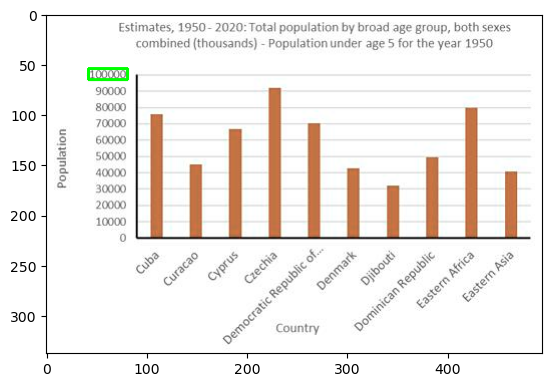

In [344]:
path = data['image_path'][3]
img = cv2.imread(path)

text = data['text'][3]
text = text.replace("'","\"")
text_list = json.loads(text)
text_sample =text_list[3]

x1 = text_sample['polygon']['x0']
x2 = text_sample['polygon']['x2']
y1 = text_sample['polygon']['y1']
y2 = text_sample['polygon']['y3']

bbox = (x1, x2, y1, y2)
copy = img.copy()
cv2.rectangle(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(copy)
plt.show()

[([[9, 9], [51, 9], [51, 23], [9, 23]], '100000', 0.8181981943206658)]

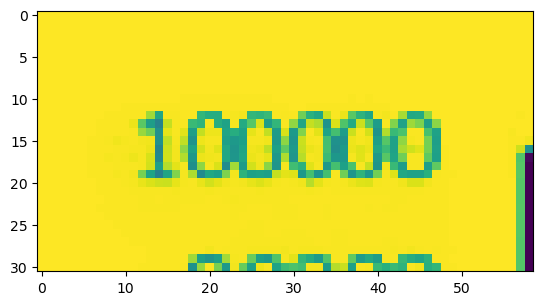

In [345]:
# Cropping the image to be just around the bbox of desired text
cropped_image = img[y1-10:y2+10, x1-10:x2+10]
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)
plt.imshow(bfilter)
results =reader.readtext(bfilter, allowlist ='0123456789')
results


# Reading non-numerical text

In [393]:
data[data['chart-type'] == 'vertical_bar']

,Unnamed: 0,source,chart-type,text,data-series,plot-bb.height,plot-bb.width,plot-bb.x0,plot-bb.y0,axes.x-axis.ticks,...,axes.y-axis.ticks,axes.y-axis.tick-type,axes.y-axis.values-type,visual-elements.bars,visual-elements.boxplots,visual-elements.dot points,visual-elements.lines,visual-elements.scatter points,file_name,image_path
1,1,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 109, 'x1': 355, '...","[{'x': 'Jordan', 'y': 88.35159235668789}, {'x'...",164,393,68,37,"[{'id': 11, 'tick_pt': {'x': 87, 'y': 200}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 68, 'y': 37}}, {'i...",markers,numerical,"[{'height': 103, 'width': 19, 'x0': 77, 'y0': ...",[],[],[],[],75c0449f6917,../data/interim/Barplots/75c0449f6917.jpg
3,3,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 71, 'x1': 465, 'x...","[{'x': 'Cuba', 'y': 75695.38632268383}, {'x': ...",165,396,89,60,"[{'id': 14, 'tick_pt': {'x': 110, 'y': 225}}, ...",...,"[{'id': 3, 'tick_pt': {'x': 89, 'y': 60}}, {'i...",markers,numerical,"[{'height': 124, 'width': 12, 'x0': 104, 'y0':...",[],[],[],[],58595c30beab,../data/interim/Barplots/58595c30beab.jpg
6,6,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 49, 'x1': 417, 'x...","[{'x': 'Jamaica', 'y': 36.43411033235605}, {'x...",103,408,52,65,"[{'id': 14, 'tick_pt': {'x': 73, 'y': 168}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 52, 'y': 65}}, {'i...",markers,numerical,"[{'height': 75, 'width': 21, 'x0': 62, 'y0': 9...",[],[],[],[],5022600d52d7,../data/interim/Barplots/5022600d52d7.jpg
10,10,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 28, 'x1': 42, 'x2...","[{'x': '1', 'y': 62.45402663284719}, {'x': '2'...",210,427,50,36,"[{'id': 8, 'tick_pt': {'x': 65, 'y': 246}}, {'...",...,"[{'id': 0, 'tick_pt': {'x': 50, 'y': 36}}, {'i...",markers,numerical,"[{'height': 187, 'width': 11, 'x0': 60, 'y0': ...",[],[],[],[],32176a89b822,../data/interim/Barplots/32176a89b822.jpg
14,14,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 74, 'x1': 473, 'x...","[{'x': 'Harney', 'y': 75.91000641635438}, {'x'...",220,427,64,38,"[{'id': 14, 'tick_pt': {'x': 78, 'y': 258}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 64, 'y': 38}}, {'i...",markers,numerical,"[{'height': 167, 'width': 14, 'x0': 71, 'y0': ...",[],[],[],[],3d895e511690,../data/interim/Barplots/3d895e511690.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60564,60564,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 54, 'x1': 392, 'x...","[{'x': 'New Caledonia', 'y': 109.6508019032642...",99,415,68,82,"[{'id': 10, 'tick_pt': {'x': 90, 'y': 181}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 68, 'y': 82}}, {'i...",markers,numerical,"[{'height': 90, 'width': 22, 'x0': 78, 'y0': 9...",[],[],[],[],e206fef0ada3,../data/interim/Barplots/e206fef0ada3.jpg
60566,60566,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 46, 'x1': 417, 'x...","[{'x': 'Dade', 'y': 16705.99023519236}, {'x': ...",136,384,72,59,"[{'id': 3, 'tick_pt': {'x': 83, 'y': 195}}, {'...",...,"[{'id': 18, 'tick_pt': {'x': 72, 'y': 59}}, {'...",markers,numerical,"[{'height': 25, 'width': 12, 'x0': 78, 'y0': 1...",[],[],[],[],cb88fc58cf0a,../data/interim/Barplots/cb88fc58cf0a.jpg
60571,60571,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 74, 'x1': 407, 'x...","[{'x': '1990', 'y': 101.9093000328623}, {'x': ...",203,402,51,41,"[{'id': 13, 'tick_pt': {'x': 68, 'y': 244}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 51, 'y': 41}}, {'i...",markers,numerical,"[{'height': 133, 'width': 15, 'x0': 60, 'y0': ...",[],[],[],[],2cd3fa2f269f,../data/interim/Barplots/2cd3fa2f269f.jpg
60572,60572,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 75, 'x1': 431, 'x...","[{'x': '39.1', 'y': 11405.00412427825}, {'x': ...",182,399,72,32,"[{'id': 12, 'tick_pt': {'x': 85, 'y': 214}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 72, 'y': 32}}, {'i...",markers,numerical,"[{'height': 51, 'width': 16, 'x0': 76, 'y0': 1...",[],[],[],[],3347e25d9a9b,../data/interim/Barplots/3347e25d9a9b.jpg


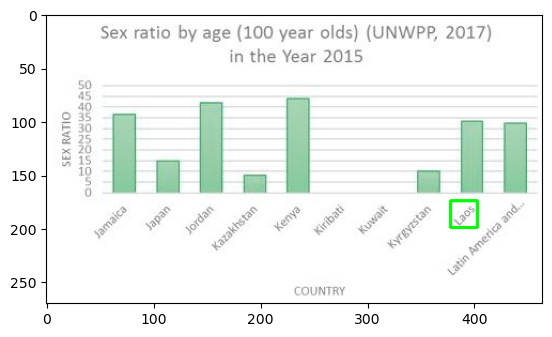

In [447]:
path = data['image_path'][6]
img = cv2.imread(path)

text = data['text'][6]
text = text.replace("'","\"")
text_list = json.loads(text)
text_sample =text_list[22]

x1 = text_sample['polygon']['x0']
x2 = text_sample['polygon']['x2']
y1 = text_sample['polygon']['y1']
y2 = text_sample['polygon']['y3']

bbox = (x1, x2, y1, y2)
copy = img.copy()
cv2.rectangle(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(copy)
plt.show()

IndexError: list index out of range

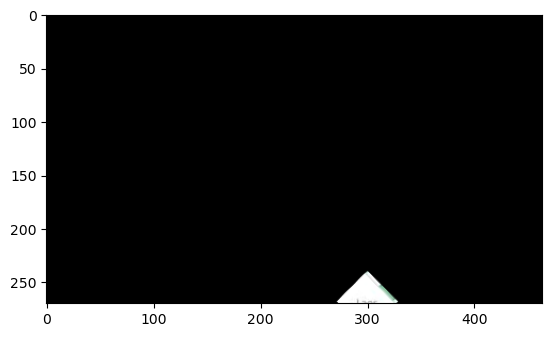

In [448]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[y1-10:y2+10, x1-10:x2+10] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
rot_img = imutils.rotate(masked_img,-45,scale=0.9)
results =reader.readtext(rot_img)
plt.imshow(rot_img)
results[0][1]


'JImJI'

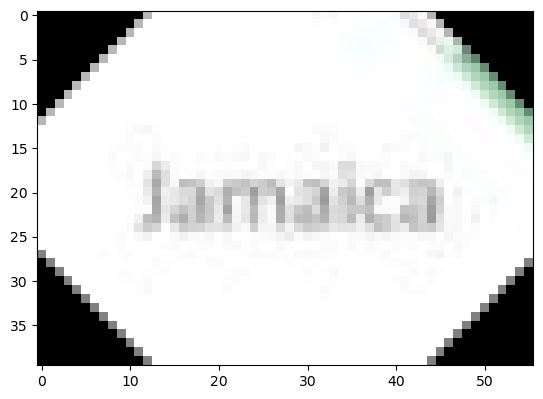

In [425]:
cropped_image = img[y1-10:y2+10, x1-10:x2+10]
rot_img = imutils.rotate(cropped_image,-45,scale=0.9)
ub = int(rot_img.shape[0]/2)-20
lb = int(rot_img.shape[0]/2)+20
bounded_img = rot_img[ub:lb,:]
plt.imshow(bounded_img)
results =reader.readtext(rot_img)
results[0][1]


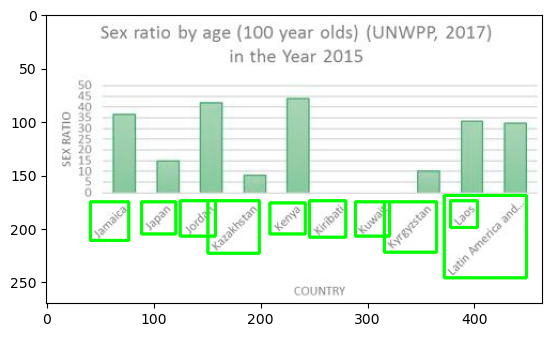

In [426]:
text_bboxes = []
for text in text_list:
    if text['role'] == 'tick_label':
        try:
            text = int(text['text'])
        except:
            x_values = [text['polygon']['x0'], text['polygon']['x1'], text['polygon']['x2'], text['polygon']['x3']]
            y_values = [text['polygon']['y0'], text['polygon']['y1'], text['polygon']['y2'], text['polygon']['y3']]
            x_min = min(x_values)
            x_max = max(x_values)
            y_min = min(y_values)
            y_max = max(y_values)
            w = x_max - x_min
            h = y_max - y_min
            x1, y1, x2, y2 = x_min, y_min, x_min + w, y_min + h
            text_bboxes.append((x1,y1,x2,y2))
        
copy = img.copy()
for bbox in text_bboxes:
    x1, y1, x2, y2 = bbox
    cv2.rectangle(copy, (x1,y1), (x2,y2),(0, 255, 0), 2)
plt.imshow(copy)
plt.show()

In [429]:
extracted_text = []
for bbox in text_bboxes:
    x1, y1, x2, y2 = bbox
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[y1-10:y2+10, x1-10:x2+10] = 255
    masked_img = cv2.bitwise_and(img,img,mask = mask)
    rot_img = imutils.rotate(masked_img,-45,scale=0.9)
    results =reader.readtext(rot_img)
    text = results[0][1]
    extracted_text.append(text)

IndexError: list index out of range

In [ ]:
extracted_text

In [428]:
extracted_text = []
for bbox in text_bboxes:
    x1, y1, x2, y2 = bbox
    cropped_image = img[y1-10:y2+10, x1-10:x2+10]
    rot_img = imutils.rotate(cropped_image,-45,scale=0.9)
    ub = int(rot_img.shape[0]/2)-20
    lb = int(rot_img.shape[0]/2)+20
    bounded_img = rot_img[ub:lb,:]
    results =reader.readtext(bounded_img)
    text = results[0][1]
    extracted_text.append(text)

IndexError: list index out of range

In [392]:
extracted_text

['Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of.',
 'Denmark',
 'Djibauti',
 'Dominican Republic',
 'Eastern Africa',
 'Eastern Asia']